In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import figure
import scipy.optimize as optimize
from scipy.optimize import curve_fit

In [2]:
file = fits.open("/local/php23efp/raw_datasets/niriss_lsr1835/quicklook_dr/LSRJ1835+3259_box_spectra_fullres_nofcal_30.fits")
wlo = file[1].data
whi = file[2].data
wmid = 0.5*(wlo+whi)
flux = file[3].data


In [3]:
total_sum = np.zeros(2048)

for i in range(475):
    total_sum = total_sum + flux[i]

average_arr = total_sum/475

In [4]:
hdr = file[9].header
time = file[9].data
time2 = time - time[0]

In [5]:
n = 2047
dynamic = np.zeros((475, 2048))
for i in range(475):
    for j in range(2048):
        dynamic[i,j] = flux[i, n-j] - average_arr[n-j]

In [6]:
def sinusoidal_fn(x, a, b,c, d):
    return ((a*np.cos((b*x)+c)+d))

params, params_covariance = curve_fit(sinusoidal_fn, time, flux[:,2000], p0=[40, 61, 0, 1500])

In [7]:
amplitudes = np.zeros(2048)

for i in range(2048):
    params, params_covariance = curve_fit(sinusoidal_fn, time, flux[:,i], p0=[15, 50, 0, 1500])
    amplitude_not = params[0]
    amplitudes[i] = np.sqrt(amplitude_not**2)

In [8]:
total_sum2 = np.zeros(475)

for i in range(2048):
    total_sum2 = total_sum2 + flux[:,i]

average_arr2 = total_sum2/2048

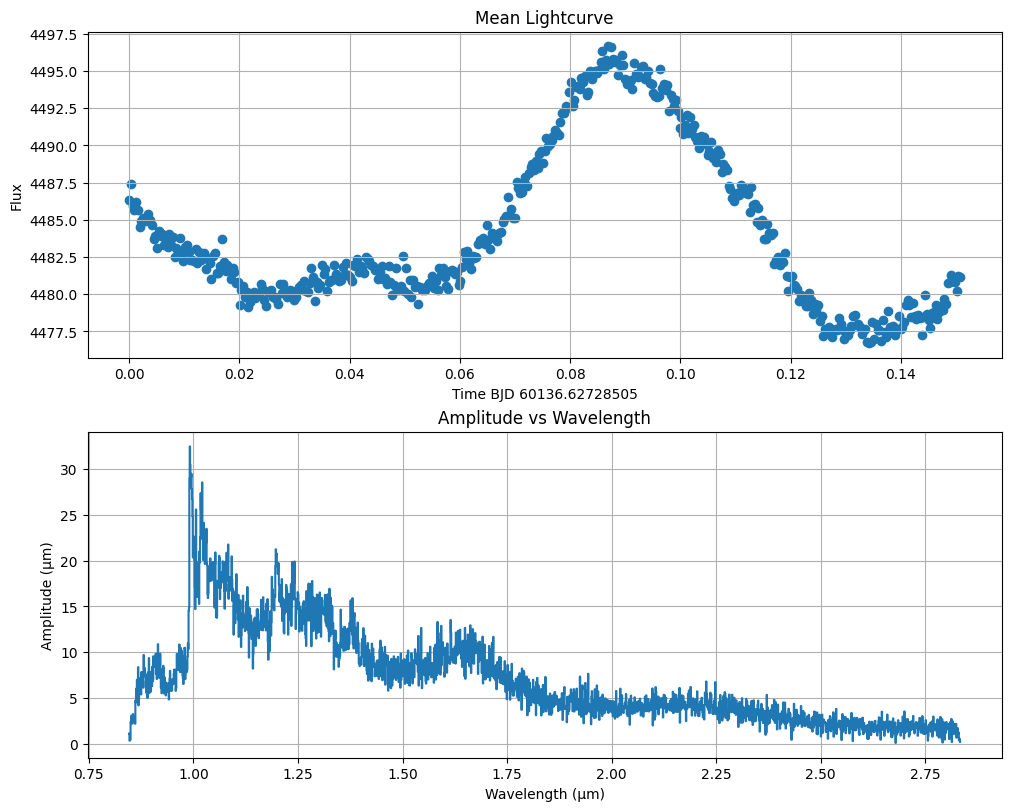

In [11]:
mosaic = """
    AA
    BB
    """
ax_dict = plt.figure(constrained_layout = True, figsize=(10, 8)).subplot_mosaic(mosaic)
plot_A = ax_dict["A"].scatter(time2, average_arr2)
ax_dict['A'].set_xlabel('Time BJD 60136.62728505')
ax_dict['A'].set_ylabel('Flux')
ax_dict['A'].set_title('Mean Lightcurve')
ax_dict["A"].grid()



plot_B =ax_dict["B"].step(wmid[1], amplitudes)
ax_dict['B'].set_xlabel('Wavelength (μm)')
ax_dict['B'].set_ylabel('Amplitude (μm)')
ax_dict['B'].set_title('Amplitude vs Wavelength')
ax_dict["B"].grid()
plt.show()

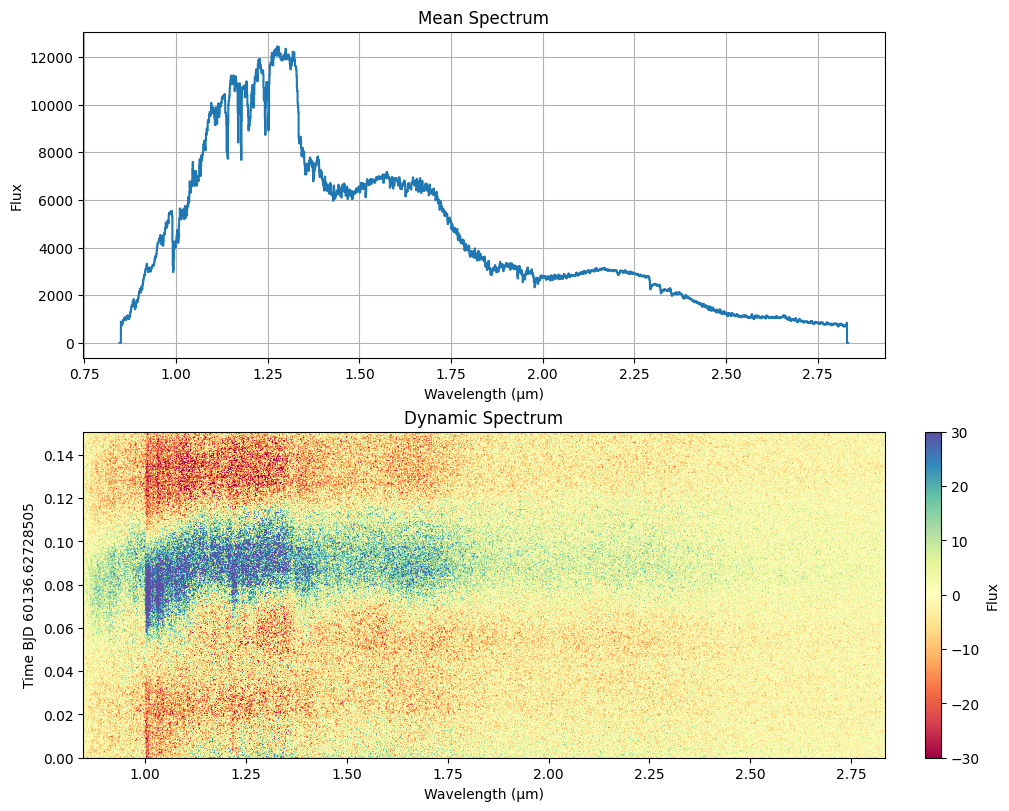

In [10]:
mosaic = """
    AA
    BB
    """
ax_dict = plt.figure(constrained_layout = True, figsize=(10, 8)).subplot_mosaic(mosaic)
plot_A = ax_dict["A"].step(wmid[1], average_arr)
ax_dict['A'].set_xlabel('Wavelength (μm)')
ax_dict['A'].set_ylabel('Flux')
ax_dict['A'].set_title('Mean Spectrum')
ax_dict["A"].grid()



plot_B =ax_dict["B"].imshow(dynamic, cmap='Spectral', origin = 'lower', extent= [ wmid[1,2047], wmid[1,0] ,time2[0], time2[474] ],  vmin= -30, vmax = 30, aspect = 'auto')
ax_dict['B'].set_xlabel('Wavelength (μm)')
ax_dict['B'].set_ylabel('Time BJD 60136.62728505')
ax_dict['B'].set_title('Dynamic Spectrum')

plt.colorbar(plot_B, ax = [ax_dict["B"]], label = "Flux", location = 'right')
plt.show()